<a href="https://colab.research.google.com/github/farreltama/MachineLearning/blob/main/machinelearning_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Automobile.csv to Automobile.csv
Mean Squared Error (MSE): 0.8841721120479537
Root Mean Squared Error (RMSE): 0.9403042656757192
R-squared (R²): 0.39760995160538615


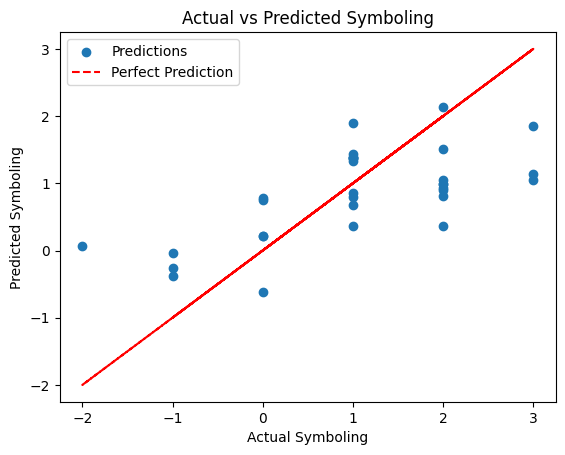

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import the text file manually in Google Colab
from google.colab import files
uploaded = files.upload()

# Load dataset (update path based on uploaded file)
file_path = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_path)

# Convert necessary columns to numeric (handle non-numeric values)
for col in ['horsepower', 'engine-size', 'curb-weight', 'length', 'width', 'height', 'wheel-base', 'highway-mpg', 'city-mpg']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values (drop rows with NaN values for simplicity)
df = df.dropna()

# Select features and target variable
features = ['highway-mpg', 'city-mpg', 'horsepower', 'engine-size', 'curb-weight', 'length', 'width', 'height', 'wheel-base']
target = 'symboling'
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Visualization with dashed line for better clarity
plt.scatter(y_test, y_pred, label="Predictions")
plt.plot(y_test, y_test, 'r--', label="Perfect Prediction")  # Dashed red line for reference
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Actual vs Predicted Symboling")
plt.legend()
plt.show()
